In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/content/sales_train.csv')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
train['day'] = train['date'].str[:2]
train['month'] = train['date'].str[3:5]
train['year'] = train['date'].str[-4:]

In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,02,01,2013
1,03.01.2013,0,25,2552,899.00,1.0,03,01,2013
2,05.01.2013,0,25,2552,899.00,-1.0,05,01,2013
3,06.01.2013,0,25,2554,1709.05,1.0,06,01,2013
4,15.01.2013,0,25,2555,1099.00,1.0,15,01,2013


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
 6   day             object 
 7   month           object 
 8   year            object 
dtypes: float64(2), int64(3), object(4)
memory usage: 201.6+ MB


In [6]:
train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
day               0
month             0
year              0
dtype: int64

In [7]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


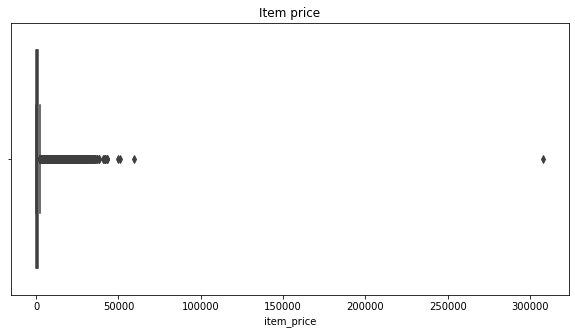

In [8]:
plt.figure(figsize = (10,5))
sns.boxplot(train['item_price']) 
plt.title('Item price')
plt.show()

In [9]:
len(train[train.item_price>250000])

1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


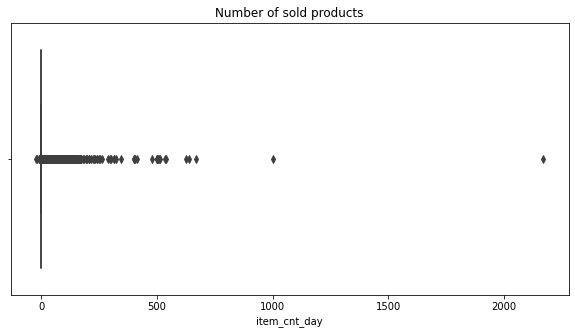

In [10]:
plt.figure(figsize = (10,5))
sns.boxplot(train['item_cnt_day']) 
plt.title('Number of sold products')
plt.show()

In [11]:
len(train[train.item_cnt_day>900])

2

In [12]:
len(train[train['item_cnt_day']<0])

7356

In [13]:
len(train[train['item_price']<=0])

1

Из описательной статистики и построенных графиков понятно, что в датафрейме учитываются возвраты товаров в виде отрицательного числа покупок, а также присутствуют отрицательные цены. Кроме того, присутствуют явные выбросы в ценах и количестве проданных товаров. Учитывая то, что их число сравнительно мало по сравнению с размером датасета, их можно удалить.

In [14]:
train = train[train['item_cnt_day']>-1]
train = train[train['item_cnt_day']<900]

train = train[train['item_price']>0]
train = train[train['item_price']<30000]

Проверим столбцы на наличие корреляции. Корреляции не наблюдается.

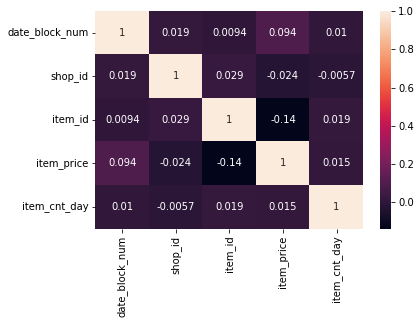

In [15]:
sns.heatmap(train.corr(), annot=True)

Посмотрим на общее число продаж со всех магазинов. Виден тренд на спад, а также сезонные пики продаж в декабре.

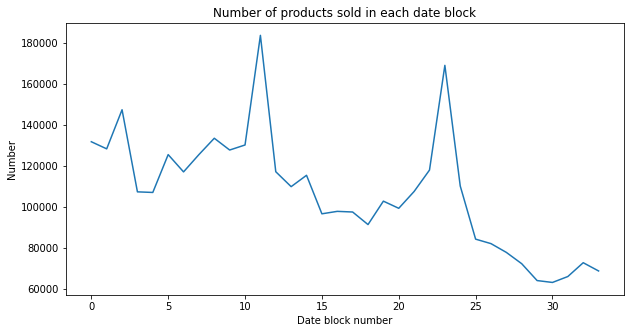

In [16]:
plt.figure(figsize = (10,5))
count = train.groupby('date_block_num')['item_cnt_day'].agg('sum').reset_index()
count['item_cnt_day'].plot()
plt.title('Number of products sold in each date block')
plt.xlabel('Date block number')
plt.ylabel('Number')
plt.show()

Посмотрим на количества продаж в каждом из магазинов. Из графика видно, что наибольшее количество продаж наблюдается в магазинах, id которых 25, 28, 31, 42 и 57

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


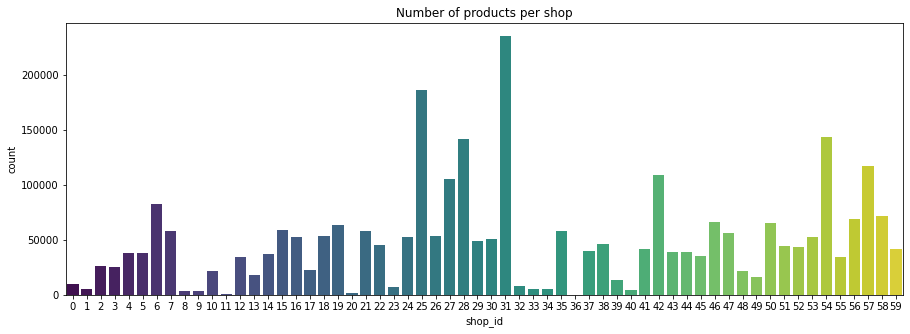

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(train['shop_id'], palette='viridis') 
plt.title('Number of products per shop')
plt.show()

Посмотрим на распределение цен. Видно, что большинство товаров находятся в ценовом сегменте от 0 до 1000 рублей.

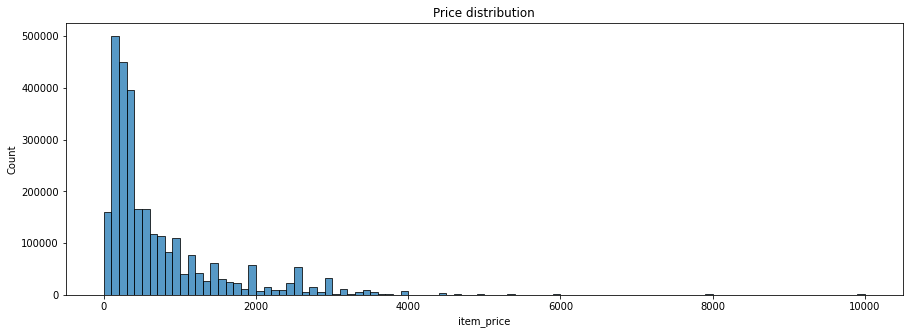

In [18]:
plt.figure(figsize=(15,5))
plt.title('Price distribution')
sns.histplot(data = train[train.item_price<10000], x='item_price', bins=100)
plt.show()

Посмотрим на графики продаж по дням, месяцам и годам. Видно, что спрос на товары немного падает в середине каждого месяца. Самый высокий спрос на товары в новогодние праздники, т.е. в декабре и январе. Кроме того, каждый год наблюдается уменьшение спроса на товары.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


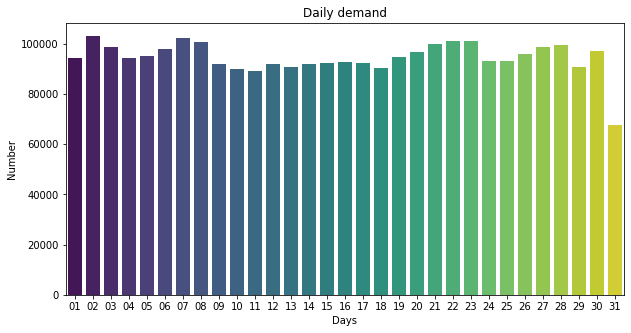

In [19]:
plt.figure(figsize=(10,5))
train = train.sort_values(by=['day'])
sns.countplot(train['day'], palette='viridis')
plt.title('Daily demand')
plt.xlabel('Days')
plt.ylabel('Number')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


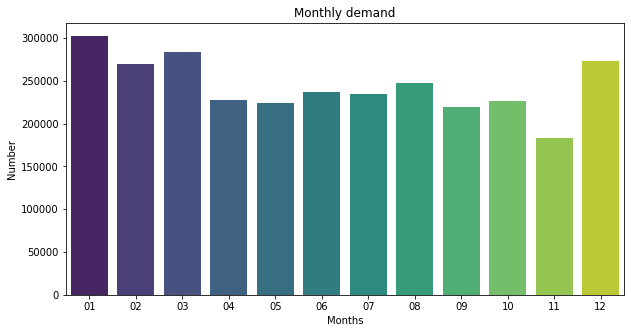

In [20]:
plt.figure(figsize=(10,5))
train = train.sort_values(by=['month'])
sns.countplot(train['month'], palette='viridis')
plt.title('Monthly demand')
plt.xlabel('Months')
plt.ylabel('Number')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


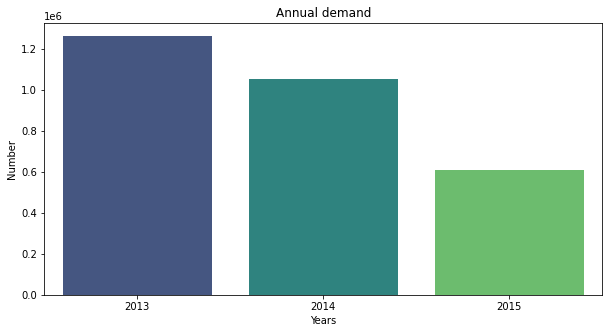

In [21]:
plt.figure(figsize=(10,5))
train = train.sort_values(by=['year'])
sns.countplot(train['year'], palette='viridis')
plt.title('Annual demand')
plt.xlabel('Years')
plt.ylabel('Number')
plt.show()